<a href="https://colab.research.google.com/github/zwzzhong/Customer_Churn_Prediction/blob/master/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Customer Churn Prediction**

 **Extracted from sgi.com, the dataset included 20 attributes of customers for us to predict which customer is about to churn using machine laerning algorithms.** 

**Data source: https://www.kaggle.com/c/customer-churn-prediction/data**

###**Goal: Predict whether customer about to churn or not.**

#Ingest

### **Connect to data via Google Drive**

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### **Import packages**

In [0]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

### **Overview the Data**

In [0]:
# Read in the dataset
churn = pd.read_csv("/content/drive/My Drive/customer-churn-prediction/churn_train.txt", sep=',', index_col=False)
#churn = pd.read_csv("/content/drive/My Drive/customer-churn-prediction/churn_train.csv", sep=',')
churn.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [0]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
st            3333 non-null object
 acclen       3333 non-null int64
 arcode       3333 non-null int64
 phnum        3333 non-null object
 intplan      3333 non-null object
 voice        3333 non-null object
nummailmes    3333 non-null int64
 tdmin        3333 non-null float64
 tdcal        3333 non-null int64
 tdchar       3333 non-null float64
 temin        3333 non-null float64
 tecal        3333 non-null int64
 tecahr       3333 non-null float64
 tnmin        3333 non-null float64
 tn cal       3333 non-null int64
 tnchar       3333 non-null float64
 timin        3333 non-null float64
 tical        3333 non-null int64
 tichar       3333 non-null float64
 ncsc         3333 non-null int64
 label        3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [0]:
churn.describe()

,acclen,arcode,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar,ncsc
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#Data Preprocessing

**Select the columns we want**

In [0]:
churn.columns

Index(['st', ' acclen', ' arcode', ' phnum', ' intplan', ' voice',
       'nummailmes', ' tdmin', ' tdcal', ' tdchar', ' temin', ' tecal',
       ' tecahr', ' tnmin', ' tn cal', ' tnchar', ' timin', ' tical',
       ' tichar', ' ncsc', ' label'],
      dtype='object')

st - state

acclen - account length

arcode - area code

phnum - phone number

intplan - internet plan (yes/no)

voice - voice

nummailmes - no of email messages

tdmin - total day minutes

tdcal - total day time calls

tdchar - total day time charges

temin - total evening time minutes

tecal - total evening time calls

tecahr - total evening time charges

tnmin - total night time minutes

tn cal - total night time calls

tnchar - total night time charges

timin - total international minutes

tical - total international calls

tichar - total international charges

ncsc - no. of customer services calls

label - Churned? (True/False)

In [0]:
churn = churn.drop([' arcode', ' phnum'], axis=1)

In [0]:
churn.loc[churn[' label'] == ' True.', 'churn'] = 1
churn.loc[churn[' label'] == ' False.', 'churn'] = 0
churn.loc[churn[' intplan'] == ' no', 'intplan'] = 0
churn.loc[churn[' intplan'] == ' yes', 'intplan'] = 1
churn.loc[churn[' voice'] == ' no', 'voice'] = 0
churn.loc[churn[' voice'] == ' yes', 'voice'] = 1
churn = churn.drop([' label', ' intplan', ' voice'], axis=1)
churn.head()

,st,acclen,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar,ncsc,churn,intplan,voice
0,KS,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0,0.0,1.0
1,OH,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0,0.0,1.0
2,NJ,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0,0.0,0.0
3,OH,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0,1.0,0.0
4,OK,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0,1.0,0.0


#Feature Engineering

**Cluste different states into high/medium/low churn rate areas**

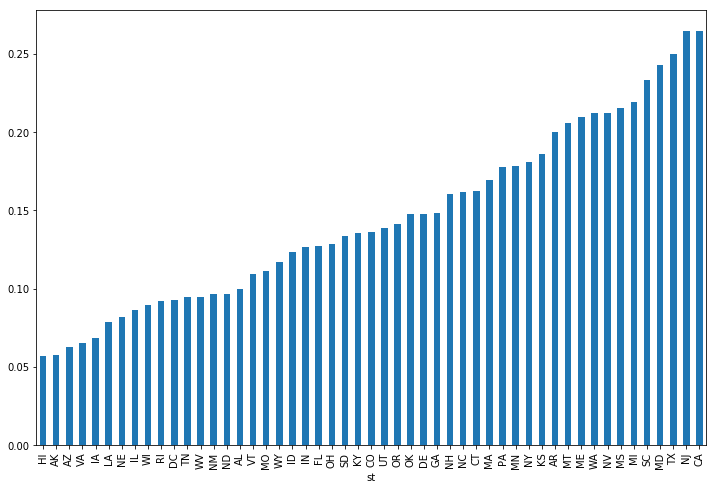

In [0]:
plt.figure(figsize=(12, 8))
st = churn.groupby('st')['churn'].mean().sort_values()
st.plot(kind='bar')

**Define threshold**

In [0]:
for i in st[st.values < 0.1].index:
  churn.loc[churn['st'] == i, 'area'] = 0

for i in st[(st.values < 0.2) & (st.values > 0.1)].index:
  churn.loc[churn['st'] == i, 'area'] = 1

for i in st[st.values > 0.2].index:
  churn.loc[churn['st'] == i, 'area'] = 2
  
churn = churn.drop('st', axis=1)
churn.head()

,acclen,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tn cal,tnchar,timin,tical,tichar,ncsc,churn,intplan,voice,area
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0,0.0,1.0,1.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0,0.0,1.0,1.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0,0.0,0.0,2.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0.0,1.0,0.0,1.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0.0,1.0,0.0,1.0


#EDA

In [0]:
churn = churn.dropna()

<Figure size 864x576 with 0 Axes>

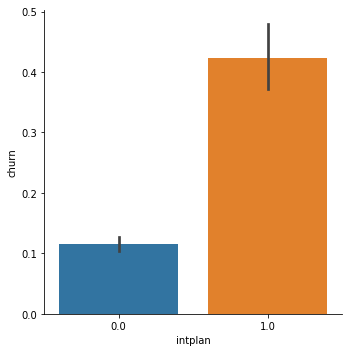

In [0]:
plt.figure(figsize=(12, 8))
sns.factorplot(data=churn, x='intplan',y ='churn', kind='bar')

**For most of the customers, if they have international plan, they are more likely to churn.**

<Figure size 864x576 with 0 Axes>

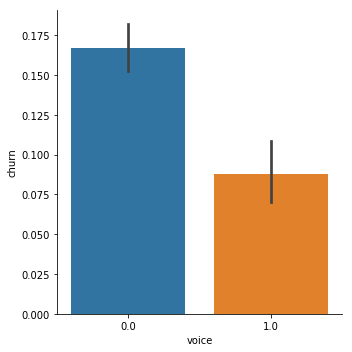

In [0]:
plt.figure(figsize=(12, 8))
sns.factorplot(data=churn, x='voice',y ='churn', kind='bar')

**For most of the customers, if they don't have voice plan, they are more likely to churn.**

<Figure size 864x576 with 0 Axes>

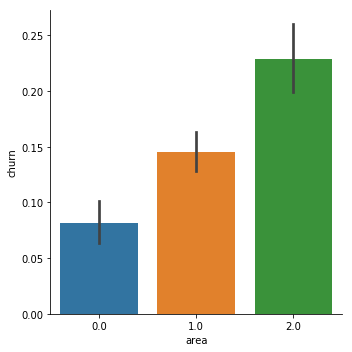

In [0]:
plt.figure(figsize=(12, 8))
sns.factorplot(data=churn, x='area',y ='churn', kind='bar')

In [0]:
print(st[st.values > 0.2].index.values)

['MT' 'ME' 'WA' 'NV' 'MS' 'MI' 'SC' 'MD' 'TX' 'NJ' 'CA']


**For customers live in 'MT' 'ME' 'WA' 'NV' 'MS' 'MI' 'SC' 'MD' 'TX' 'NJ' 'CA', they are more likely to churn**

In [0]:
churn1 = churn[churn['churn']==1]
churn0 = churn[churn['churn']==0]

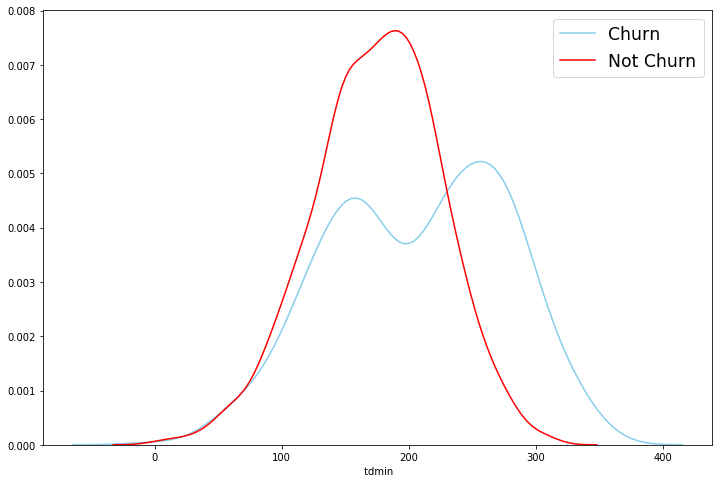

In [0]:
plt.subplots(figsize =(12, 8)) 
sns.distplot(churn1[' tdmin'], color='skyblue', label='Churn', hist=False)
sns.distplot(churn0[' tdmin'], color='red', label='Not Churn', hist=False)
plt.legend(fontsize='xx-large')

**Customers with total day minutes around 150 and 275 are more likely to churn**

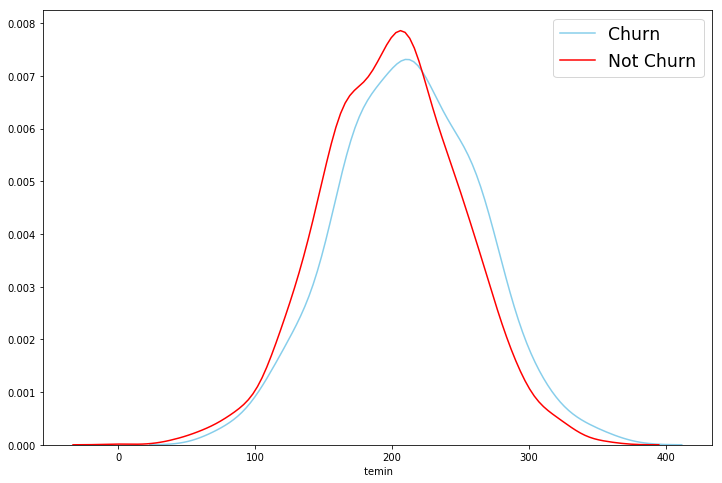

In [0]:
plt.subplots(figsize =(12, 8)) 
sns.distplot(churn1[' temin'], color='skyblue', label='Churn', hist=False)
sns.distplot(churn0[' temin'], color='red', label='Not Churn', hist=False)
plt.legend(fontsize='xx-large')

**Not much difference between these two group**

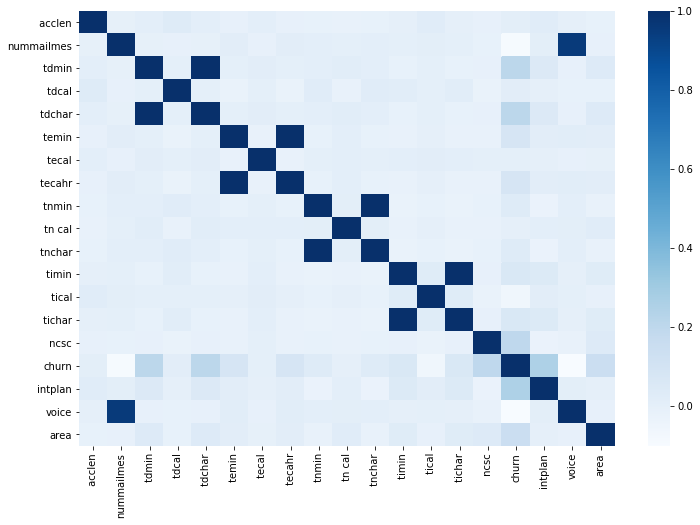

In [0]:
plt.figure(figsize=(12, 8))
churn_corr = churn.corr()
sns.heatmap(churn_corr, cmap="Blues")

# Modeling

### **Train test data split**

In [0]:
predictors = churn.drop('churn', axis=1)
target = churn['churn']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)

###**Logistic Regression**

**Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)
# evaluate	
logit.score(X_test, y_test)

0.8796875

**GridSearch for Logistic Regression**

In [0]:
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'C': np.logspace(-5, 8, 15), 'penalty': ['l2']}

# Instantiate the GridSearchCV object: logreg_cv
logit_cv = GridSearchCV(logit, param_grid, cv=5)

# Fit it to the training data
logit_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-05, 8.48343e-05, 7.19686e-04, 6.10540e-03, 5.17947e-02,
       4.39397e-01, 3.72759e+00, 3.16228e+01, 2.68270e+02, 2.27585e+03,
       1.93070e+04, 1.63789e+05, 1.38950e+06, 1.17877e+07, 1.00000e+08]), 'penalty': ['l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logit_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logit_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 1389495.494373136, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.8647380766223612


**Evaluation for Logistic Regression**

Confusion matrix, without normalization
[[536  17]
 [ 61  26]]
Normalized confusion matrix
[[0.97 0.03]
 [0.7  0.3 ]]


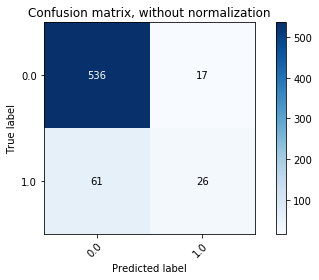

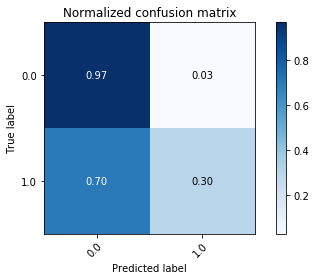

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

y_pred = logit_cv.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_test, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
y_pred = logit_cv.predict(X_test)

print('Classification Report:\n')
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       553
         1.0       0.60      0.30      0.40        87

   micro avg       0.88      0.88      0.88       640
   macro avg       0.75      0.63      0.67       640
weighted avg       0.86      0.88      0.86       640



**The confusion matrix of logistic regression model shows that the false negtive is 65, which is the left buttom area on the graph. It means that we tell people they don't churn but they actually churn, which will cause a problem that company will ignored these group of customers and don't take any actions on them to prevent them from churning. In this case, company will lost profit becasue of the high false negtive. Therefore, we want to minimize the ratio of false negative.**

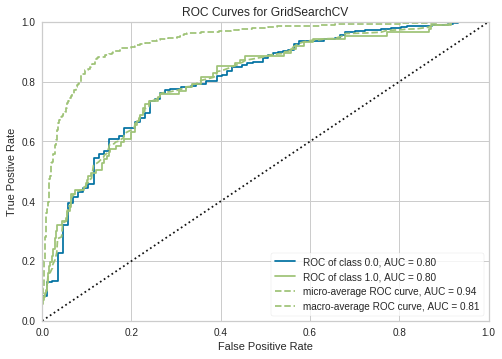

In [0]:
from yellowbrick.classifier import ROCAUC
#ROC AUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(logit_cv, classes=classes)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data


###**SVM**

**Support Vector Machine**

In [0]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = logit.predict(X_test)
# evaluate	
svm.score(X_test, y_test)

0.8640625

**GridSearch for SVM**

In [0]:
# Create the hyperparameter grid
param_grid = {'C':[1, 10, 100], 'gamma':[0.1, 0.01]}

# Instantiate the GridSearchCV object: logreg_cv
svm_cv = GridSearchCV(svm, param_grid, cv=5)

# Fit it to the training data
svm_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# Print the optimal parameters and best score
print("Tuned SVM Parameter: {}".format(svm_cv.best_params_))
print("Tuned SVM Accuracy: {}".format(svm_cv.best_score_))

Tuned SVM Parameter: {'C': 1, 'gamma': 0.1}
Tuned SVM Accuracy: 0.8526192337763878


**Evaluation for SVM**

Confusion matrix, without normalization
[[553   0]
 [ 87   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


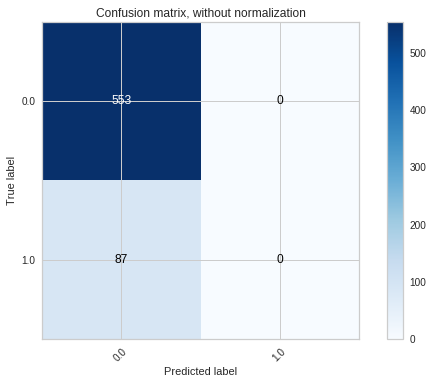

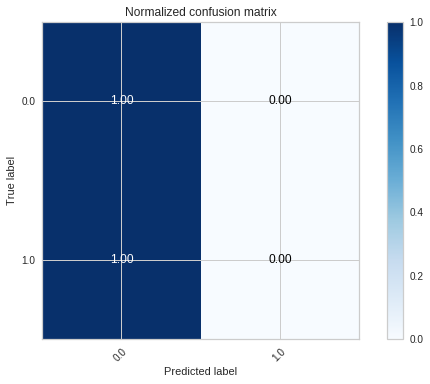

In [0]:
y_pred = svm_cv.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_test, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
y_pred = svm_cv.predict(X_test)

print('Classification Report:\n')
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       553
         1.0       0.00      0.00      0.00        87

   micro avg       0.86      0.86      0.86       640
   macro avg       0.43      0.50      0.46       640
weighted avg       0.75      0.86      0.80       640



**Same false negative issue with the SVM model. With a high false negative, it means company will lose a part of profit from this.**

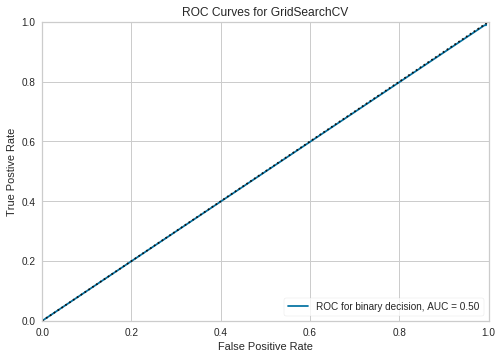

In [0]:
#ROC AUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(svm_cv, classes=classes, micro=False, macro=False, per_class=False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data


###**Random Forest**

**Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = logit.predict(X_test)
# evaluate	
rfc.score(X_test, y_test)

0.9390625

**GridSearch for Random Forest Classifier**

In [0]:
# Create the hyperparameter grid
param_grid = {'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy']}

# Instantiate the GridSearchCV object: logreg_cv
rfc_cv = GridSearchCV(rfc, param_grid, cv=5)

# Fit it to the training data
rfc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [4, 5, 6, 7], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
# Print the optimal parameters and best score
print("Tuned Random Forest Classifier Parameter: {}".format(rfc_cv.best_params_))
print("Tuned Random Forest Classifier Parameter Accuracy: {}".format(rfc_cv.best_score_))

Tuned Random Forest Classifier Parameter: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
Tuned Random Forest Classifier Parameter Accuracy: 0.9421422986708365


**Evaluation for Random Forest**

Confusion matrix, without normalization
[[548   5]
 [ 33  54]]
Normalized confusion matrix
[[0.99 0.01]
 [0.38 0.62]]


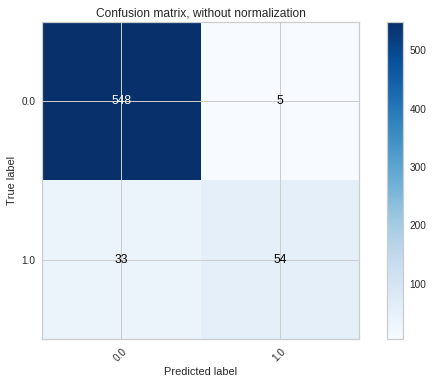

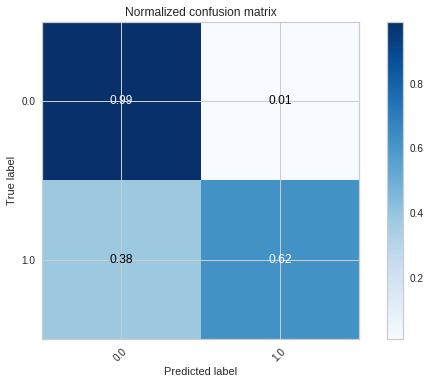

In [0]:
y_pred = rfc_cv.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_test, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
y_pred = rfc_cv.predict(X_test)

print('Classification Report:\n')
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       553
         1.0       0.92      0.62      0.74        87

   micro avg       0.94      0.94      0.94       640
   macro avg       0.93      0.81      0.85       640
weighted avg       0.94      0.94      0.94       640



**Compared to SVM and Logistic model, random forest perform a better result in false negative but it might still be not enough since in this business case we want the false negative as lower as possible, because we don't want to wrongly predict customers will not churn but they actually do. But to lower false negative might leads to an increase of false positive, which means cutomers will not churn are predicted as churning customers. But this is acceptable as long as the extra money we are spending on retain those wrongly predicted churning customers is not too high. Furthermore, spending extra efforts on those customers can somehow make them become more loyal to the company.**

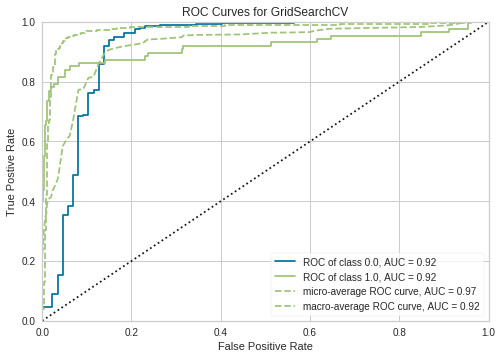

In [0]:
#ROC AUC
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(rfc_cv, classes=classes)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data


##**Model Comparison**

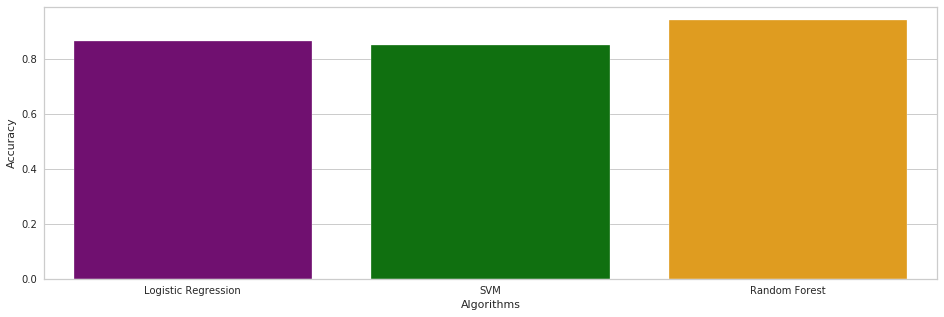

In [0]:
methods = ["Logistic Regression", "SVM", "Random Forest"]
accuracy = [logit_cv.best_score_, svm_cv.best_score_, rfc_cv.best_score_]
colors = ["purple", "green", "orange"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,1, step=0.2))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

# Conclusion & Recommendations



*   **In this business case, false negative is a more serious problem compared to false postive as long as the extra money spending on retaining false postive customers is not too high**
*   **For all three different classification models, Random Forest performs the best with an accuracy score of 94%, after tunning the hyperparameters**
*   **To reduce the churn rate, according to results from EDA, I would recommend to give promotion to customer with international plan or without voice plan since they are more likely to churn.**
*   **Also, if customers are from 'MT' 'ME' 'WA' 'NV' 'MS' 'MI' 'SC' 'MD' 'TX' 'NJ' 'CA', they are more likely to churn. Company should spend more effort on retaining customer in those areas**
*   **Daytime spending of customers is also an important feature of churn, if customers have total daytime minutes around 150 and 275, they should be targeted for promotion in order to reduce the churn rate of this group.**



